<a href="https://colab.research.google.com/github/AnishaBeck/ML/blob/main/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

1. Apply Decision Tree for the dataset.

2. Apply Linear Regression for the dataset given.

Identify the combination of features that are highly correlated with the target variable Visualize the results wherever necessary Normalize the dataset and Justify if normalization is required for the given data to improve the performance of the Linear Regression Model

# Decision Tree

In [ ]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sqlite3

In [ ]:
data = pd.read_csv("/content/movies.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [ ]:
uniqueCount = data.nunique()
print("unique count across columns: ")
print(uniqueCount)

unique count across columns: 
name        7512
rating        12
genre         19
year          41
released    3414
score         72
votes        936
director    2949
writer      4535
star        2814
country       59
budget       413
gross       7472
company     2385
runtime      138
dtype: int64


In [ ]:
df_reduced = data.fillna(data.mean())
df_reduced.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
df_reduced.isnull().sum()

name         0
rating      77
genre        0
year         0
released     2
score        0
votes        0
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      0
dtype: int64

In [ ]:
df_clean = df_reduced.fillna("unknown")
df_clean.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
df_clean.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [ ]:
df_clean['success'] = df_clean.apply(lambda row: 1 if row['gross'] > row['budget'] else 0, axis = 1)
df_clean.success.value_counts(normalize = True)

1    0.524909
0    0.475091
Name: success, dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [ ]:
df_clean.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime', 'success'],
      dtype='object')

In [ ]:
categorical_col = []
for column in df_clean:
  if df_clean[column].dtype == object and len(df_clean[column].unique()) <= 50:
    categorical_col.append(column)

feature_cols = ['score','votes','budget','year','gross','runtime']
X = df_clean[feature_cols]
y = df_clean.success

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state = 42)

In [ ]:
# create decision tree object
clf = DecisionTreeClassifier()
# train
clf = clf.fit(X_train, y_train)

In [ ]:
# predict
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.990438939591482


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1072,   16],
       [   6, 1207]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


DecisionTreeClassifier(max_depth=9, min_samples_leaf=2)

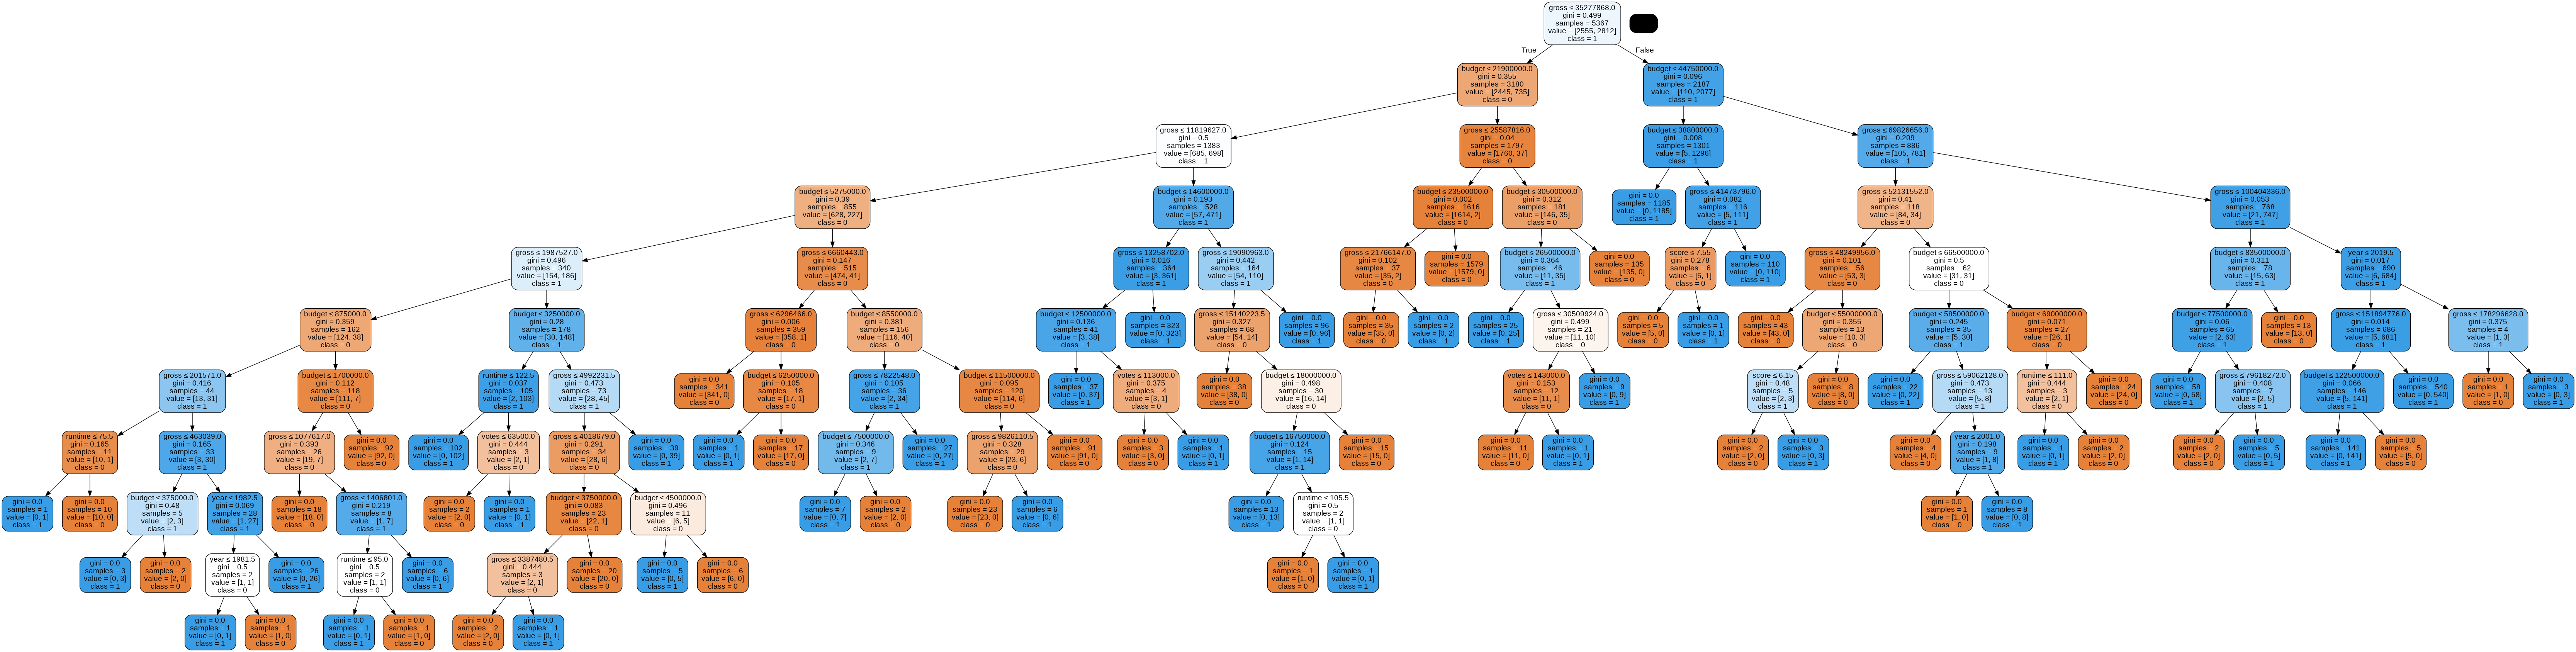

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot
import pydotplus
from pydotplus import graph_from_dot_data

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('movies.png')
Image(graph.create_png())

# Linear Regression

In [ ]:
df = pd.read_csv('/content/Test.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38272 entries, 0 to 38271
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      38272 non-null  float64
 1   V       38272 non-null  float64
 2   AP      38272 non-null  float64
 3   RH      38272 non-null  float64
dtypes: float64(4)
memory usage: 1.2 MB


In [ ]:
df1 = pd.read_csv('/content/sample_submission.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38272 entries, 0 to 38271
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PE      38272 non-null  float64
dtypes: float64(1)
memory usage: 299.1 KB


In [ ]:
pd.concat([df, df1]).to_csv('ccpp.csv', index=True)

In [ ]:
df=pd.read_csv('/content/ccpp.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76544 entries, 0 to 76543
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  76544 non-null  int64  
 1   AT          38272 non-null  float64
 2   V           38272 non-null  float64
 3   AP          38272 non-null  float64
 4   RH          38272 non-null  float64
 5   PE          38272 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 3.5 MB


In [ ]:
#show the number of cells in the dataframe
print("dataset size: ", df.size)

#show the number of records (rows) in the dataframe
print("number of records: ", len(df))

#show the number of features (coulmns) in the dataframe (exculde the response variable)
print("number of features: ", len(df.columns)-1)

dataset size:  459264
number of records:  76544
number of features:  5


In [ ]:
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)
df.head(5)

,Unnamed: 0,AT,V,AP,RH,PE


In [ ]:
df.isnull().sum()

Unnamed: 0    0.0
AT            0.0
V             0.0
AP            0.0
RH            0.0
PE            0.0
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      int64  
 1   AT          0 non-null      float64
 2   V           0 non-null      float64
 3   AP          0 non-null      float64
 4   RH          0 non-null      float64
 5   PE          0 non-null      float64
dtypes: float64(5), int64(1)
memory usage: 0.0 bytes


In [ ]:
import pandas as pd
df = pd.DataFrame(data)
corrMatrix = df.corr()
print (corrMatrix)

             year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.329321  0.257486  0.120811
score    0.097995  1.000000  0.409182  0.076254  0.186258  0.399451
votes    0.222945  0.409182  1.000000  0.442429  0.630757  0.309212
budget   0.329321  0.076254  0.442429  1.000000  0.740395  0.320447
gross    0.257486  0.186258  0.630757  0.740395  1.000000  0.245216
runtime  0.120811  0.399451  0.309212  0.320447  0.245216  1.000000


In [ ]:
#to run the k-cross validation 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
#Prepare a cross validation model with 10 folds
Cross_Validation = KFold(n_splits = 10, shuffle=True, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression   #start the implementation time counter
LR_Model = LinearRegression()  #prepare the linear regression model

#fit the training set into the linear regression model & evaluate the performance using cross validation scores
LR_performance_scores = cross_val_score(LR_Model, X_train, y_train, cv=Cross_Validation) 

print('the performance scores of the linear regression:')
print(LR_performance_scores)

#get the average of the scores
LR_average_performance = LR_performance_scores.mean()

print('Linear Regression Results: ')
print('Performance = ', LR_average_performance)

the performance scores of the linear regression:
[0.24422769 0.23310125 0.22186277 0.22096149 0.14709512 0.24727854
 0.23185416 0.20975859 0.22437563 0.25082336]
Linear Regression Results: 
Performance =  0.22313385969008745
